# Stats

Some easy numbers about habits

# % of scrobbles with attached URIs

95.10% joined tracks


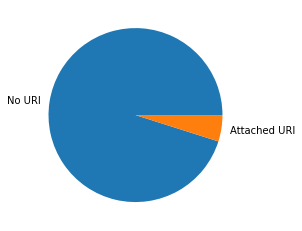

In [3]:
no_uri = (
    'SELECT ' 
    '   COUNT(track) '
    'FROM `sarsooxyz.scrobbles.*` '
    'WHERE '
    '  uri IS NOT NULL '
)

uri = (
    'SELECT ' 
    '   COUNT(track) '
    'FROM `sarsooxyz.scrobbles.*` '
)

no_uri_count = list(client.query(no_uri).result())[0][0]
uri_count = list(client.query(uri).result())[0][0]

print(f'{( no_uri_count / uri_count ) * 100:.2f}% joined tracks')
plt.pie([no_uri_count, uri_count - no_uri_count], labels=["No URI", "Attached URI"])
plt.show()

In [2]:
from google.cloud import bigquery
import matplotlib.pyplot as plt
from dotenv import load_dotenv

load_dotenv()

client = bigquery.Client()